### Trying different Classification models on Mobile Price Dataset


Dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the Mobile Phones dataset.

In [2]:
data = pd.read_csv("MobilePhones.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Checking the type and fullness of the data. There are no empty examples or String features that would require executing pre-processing steps.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


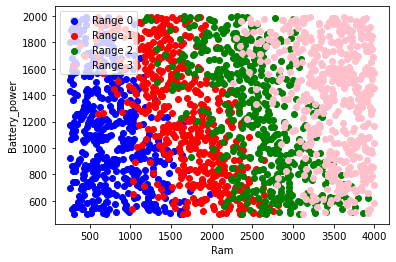

In [5]:
ram_0=data[data['price_range']==0]['ram']
battery_power_0=data[data['price_range']==0]['battery_power']
plt.scatter(ram_0, battery_power_0, color='blue', label='Range 0')

ram_1=data[data['price_range']==1]['ram']
battery_power_1=data[data['price_range']==1]['battery_power']
plt.scatter(ram_1, battery_power_1, color='red', label='Range 1')

ram_2=data[data['price_range']==2]['ram']
battery_power_2=data[data['price_range']==2]['battery_power']
plt.scatter(ram_2, battery_power_2, color='green', label='Range 2')

ram_3=data[data['price_range']==3]['ram']
battery_power_3=data[data['price_range']==3]['battery_power']
plt.scatter(ram_3, battery_power_3, color='pink', label='Range 3')

plt.legend()
plt.xlabel('Ram')
plt.ylabel('Battery_power')
plt.show()

After looking at the scatter plot above, we can say that if the ram increases, the price will increase too.

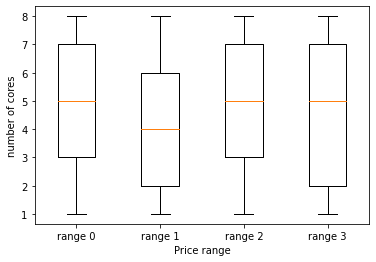

In [6]:
plt.boxplot([data[data['price_range']==0]['n_cores'], data[data['price_range']==1]['n_cores'], data[data['price_range']==2]['n_cores'], data[data['price_range']==3]['n_cores']], labels=['range 0','range 1','range 2','range 3'])
plt.ylabel('number of cores')
plt.xlabel('Price range')
plt.show()

In this graph, we see the box plot of each price range according to their number of cores. 

We can see that, min and max values of each range is the same (1 and 8 respectively). Although there are some differences in quartile and median values, we can say that price range doesn't really change according to number of cores of the phone.

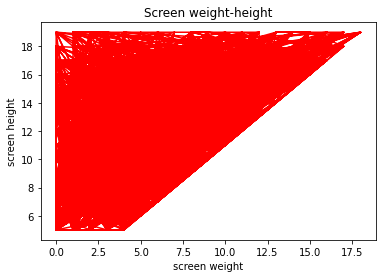

In [7]:
plt.plot(data['sc_w'], data['sc_h'], color='red')
plt.xlabel('screen weight')
plt.ylabel('screen height')
plt.title("Screen weight-height")
plt.show()

The plot above shows the screen weight and screen height of phones.

It shows that if the screen weight increases, then the height is also increases; but not vice versa.

After looking at the data, I decided to develop a classification model to predict the price range of the phones.
Since the other features are properties of phones, which determines the price. The dataset doesn't include the exact values of prices but it has their range, divided in 4 groups, from the cheapest to most expensive. The y value that I want to predict is discrete and can only take values 0, 1, 2 and 3. To achive this aim, classification is the best technique.

For that, I took out the price_range column of the data and save it as y.

In [8]:
y = data['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Creating the X. It includes all the features except price_range.

In [9]:
X = data.drop(labels='price_range', axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


Heatmap of the correlations between features of Mobile Phone. Even though there are some features with correlations 0.64, 0.58 and 0.51, I usually include all of the features unless there are some with correlation bigger than 0.75 or smaller than -0.75. 

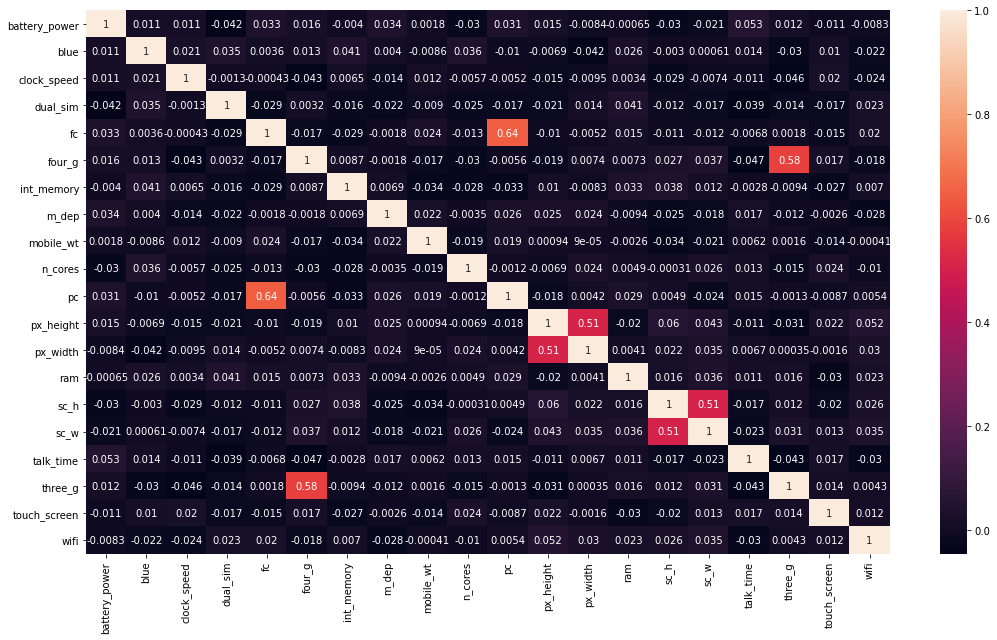

In [10]:
fig, ax = plt.subplots(figsize=(18,10)) 
sns.heatmap(X.corr(),annot=True, ax=ax)
plt.show()

Splitting the train and test sets. Divided into %80 Training set, %20 Test Set. No division for validation set because validation will be done using the cross_val_score function of the sklearn.model_selection.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape --> {X_train.shape}')
print(f'X_test shape --> {X_test.shape}')
print(f'y_train shape --> {y_train.shape}')
print(f'y_test shape --> {y_test.shape}')

X_train shape --> (1600, 20)
X_test shape --> (400, 20)
y_train shape --> (1600,)
y_test shape --> (400,)


Standardization the features using Sklearn. Fitted the train set (since standardization is a part of the model selection, we don't want to fit our scaler to the test set) and transformed both sets.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 1.54835969, -0.98142253, -1.23622976, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-1.3795348 ,  1.01892912,  0.83711156, ...,  0.55713671,
         0.9900495 ,  1.00250313],
       [-0.01091435, -0.98142253, -0.74838475, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       ...,
       [ 1.33500924,  1.01892912, -1.23622976, ...,  0.55713671,
        -1.0100505 ,  1.00250313],
       [ 1.55743843, -0.98142253, -0.74838475, ..., -1.79489161,
         0.9900495 ,  1.00250313],
       [-1.37499543,  1.01892912, -1.11426851, ...,  0.55713671,
        -1.0100505 , -0.99750312]])

### Choosing models

 I defined a function to automatize some steps of choosing the best model.
 The function takes classifier(string  indicates the classifier name) and hyper(hyper-parameters for that model) as parameters, according to classifier it tunes the hyper-parameter that I choose.
 
 I trained Logistic Regression, K-Nearest-Neighbors, Support Vector Machine, Decision Tree, Neural Network, Bernoulli Naive Bayes and Random Forest classifiers with different hyper-parameters.
 
I tuned the parameter:
   <ul>
   <li>Logistic Regression:<br>
       <b>C</b>: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    </li><br>
   <li>Decision Tree and Random Forest:<br>
       <b>max_depth</b>: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
   </li><br>
   <li>K-Nearest-Neighbors:<br>
     <b>n_neighbors</b>: Number of neighbors to use by default for kneighbors queries.</li><br>
   <li>Support Vector Machine:<br>
    <b>kernel</b>: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.</li><br>
   <li>Neural Network:<br>
       <b>learning_rate_init</b>: The initial learning rate used.
    </li><br>
   <li>Bernoulli Naive Bayes:<br>
       <b>alpha</b>: Additive smoothing parameter</li>
   </ul>
   
   Descriptions of the parameters are taken from https://scikit-learn.org/stable/modules/classes.html.
   
  
   After the if part, it calculates the cross validation score on training set using the classifier chosen and as cv=10 (10-fold). It returns cv-in this case 10- length array, I took its mean and store it in score variable. If that score is better than the best score, it changes the bestvalue variable as tuple (hyperparameter, score with that hyperparameter).
   At the end, it returns the bestvalue.
   

In [13]:
def choose(classifier, hyper):
    bestvalue=(0, 0)
    for i in hyper:
        if classifier=='SVM':
            cf = SVC(kernel=i,random_state=1)
        if classifier=='LR':
            cf = LogisticRegression(random_state=1, max_iter=100, C=i)
        if classifier=='KNN':
            cf = KNeighborsClassifier(n_neighbors=i)
        if classifier=='DT':
            cf = DecisionTreeClassifier(random_state=1, max_depth=i)
        if classifier=='NN':
            cf = MLPClassifier(learning_rate_init=i, random_state=1)
        if classifier=='NB':
            cf = BernoulliNB(alpha=i)
        if classifier=='RF':
            cf = RandomForestClassifier(random_state=1, max_depth=i)
            
        score = cross_val_score(cf, X_train, y_train, cv=10).mean()
        if score > bestvalue[1]:
            bestvalue=(i, score)
    return bestvalue

In this part, it executes the function above with the given classifiers and parameters.


For SVM, the hyper-parameter I tune is kernel. So it tries values 'linear', 'poly' and 'rbf'.

For Random Forest, Decision Trees and KNN, it tries integers ranging between 1 and 10(excluded) as parameter.
For the others, it tries some values for alpha, C, learning_rate_init.

After getting the best result from the each classifier, we see that Logistic Regression with C = 10 is the best classifier for this problem.

In [14]:
i, score =choose('SVM', ['linear','poly','rbf'])
print(f'Best SVM (with kernel = {i}) --> {score}')
i, score =choose('LR', [0.001, 0.01, 0.1, 1, 10])
print(f'Best Logistic Regression (with C = {i}) --> {score}')
i, score =choose('KNN', [i for i in range(1,10)])
print(f'Best K-Nearest-Neighbors (with K = {i}) --> {score}')
i, score =choose('DT',[i for i in range(1, 10)])
print(f'Best Decision Tree (with max_depth = {i}) --> {score}')
i, score =choose('NN',[0.0001, 0.001, 0.01, 0.1, 1])
print(f'Best Neural Network (with learning_rate_init = {i}) --> {score}')
i, score =choose('NB',[0.0001, 0.001, 0.01, 0.1, 1, 10])
print(f'Best Bernoulli Naive Bayes (with alpha = {i}) --> {score}')
i, score =choose('RF',[i for i in range(1,10)])
print(f'Best Random Forest (with max_depth = {i}) --> {score}')

Best SVM (with kernel = linear) --> 0.95875
Best Logistic Regression (with C = 10) --> 0.9637499999999999
Best K-Nearest-Neighbors (with K = 9) --> 0.5343749999999999
Best Decision Tree (with max_depth = 7) --> 0.84375
Best Neural Network (with learning_rate_init = 0.001) --> 0.9125
Best Bernoulli Naive Bayes (with alpha = 0.0001) --> 0.565
Best Random Forest (with max_depth = 9) --> 0.87375


After that, it trains the Logistic Regression with the best hyper-parameter C for the last time and does predictions on test set. The accuracy of the model is 97.25%.


In [15]:
lr = LogisticRegression(random_state=1, C=10)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9725

Accuracy score can be misleading so it checks more improved scores.

TP=True Positive

FP=False Positive

FN=False Negative

TN=True Negative

$$
Precision =  \frac{TP}{TP+FP}
$$


$$
Recall = \frac{TP}{TP + FN}
$$

$$
F_1  score = 2*\frac{Recall * Precision}{Recall + Precision}
$$


Support shows how many examples of the test set are from that class.

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       105
           1       0.94      1.00      0.97        91
           2       0.98      0.96      0.97        92
           3       0.97      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



If we display the confusion matrix, we can check the scores better.

For example, In classification report, it says that there are 105 examples which belong to class 0 and the precision is 1.0 where recall is 0.95.

We see that 100 of the examples belong to class 0 are correctly labeled. 

TP = 100

And the remaining 5, predicted as class 1. 

FN=5

$$Precision=\frac{100}{100+0}=\frac{100}{100}=1.0$$

$$Recall=\frac{100}{100+5}=\frac{100}{105}\approx{0.95}$$

$$F_1=2*\frac{1.0*0.95}{1.0+0.95}=2*\frac{0.95}{1.95}=\frac{1.90}{1.95}\approx{0.97}$$


We can see that the model predicted all of the examples of class 1 correctly but made some errors on other classes.

It predicts 5 examples from class 0 and 1 example from class 2 as class 1. 

It also predicts 3 examples from class 2 as class 3, alongside predicting 2 examples from class 3 as class 2.

Although, it made some errors, the model seems to work well. It has very high accuracy, precision, recall and $F_1$ score. Even the mistakes it made is logical. What i mean by that is, It mistakenly predicts the examples with lowest price range as the second lowest price range. Since the ranges are sharply seperated, this little mistakes are acceptable. 

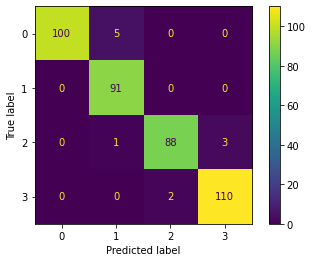

In [17]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=lr.classes_)
plt.show()